# Projeto-cientista de dados

Obtive os dados da A Lyft Bikes and Scooters, que estão disponiveis para uso publico no kaggle. (https://www.kaggle.com/datasets/kirilosyossif/cyclistic-case-study-google-certificate).




Usando esses dados, pretendo fazer uma analise e um estudo de aprendizado de maquina.

importando bibliotecas 

In [42]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



Leitura do csv

In [43]:
path = '202101-divvy-tripdata.csv'
df = pd.read_csv (path) 
df.shape

(96834, 13)

Vendo as colunas e os campos do conjunto.

In [44]:
df.head (5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


Vendo as colunas que não tem dados.

Tratando as colunas que não tem dados.



In [45]:
df['rideable_type'].value_counts()

classic_bike     61700
electric_bike    33028
docked_bike       2106
Name: rideable_type, dtype: int64

In [46]:
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
dtype: int64

In [47]:
df = df.drop(columns = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])
df.isna().sum()

ride_id            0
rideable_type      0
started_at         0
ended_at           0
start_lat          0
start_lng          0
end_lat          103
end_lng          103
member_casual      0
dtype: int64

In [48]:
df=df.dropna()

Converter os tipos dos dados

In [49]:
df.dtypes

ride_id           object
rideable_type     object
started_at        object
ended_at          object
start_lat        float64
start_lng        float64
end_lat          float64
end_lng          float64
member_casual     object
dtype: object

In [50]:
df['started_at']=pd.to_datetime(df['started_at'],format='%Y-%m-%d %H:%M:%S')
df['ended_at']=pd.to_datetime(df['ended_at'],format='%Y-%m-%d %H:%M:%S')

In [51]:
df.dtypes

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
member_casual            object
dtype: object

Criando uma coluna nova. A coluna `duration` representa a duração da corrida de bicicleta em minutos.



In [52]:
df['duration']=df['ended_at']-df['started_at']
df['duration']=df['duration'].apply(lambda x : x.total_seconds()/60)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.90,-87.70,casual,0.716667


Removendo corridas com duração negativa.

In [53]:
df=df[df['duration']>=0]



## Visualização

Gerando algumas visualizações em tabelas e graficos.

In [54]:
df_member= df[df['member_casual']=='member']
df_casual= df[df['member_casual']=='casual']

In [55]:
df_member.head()



,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member,11.700000
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,41.900391,-87.696757,41.90,-87.71,member,5.583333


In [56]:
df_casual.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.900000,-87.700000,casual,0.716667
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,41.900409,-87.696763,41.940000,-87.710000,casual,53.783333
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,41.900374,-87.696688,41.899180,-87.672178,casual,9.783333
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,41.900379,-87.696716,41.899149,-87.672177,casual,8.950000
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,41.900363,-87.696704,41.899181,-87.672200,casual,10.150000


(array([ 3983., 13965., 15337., 11424.,  8180.,  5872.,  4414.,  3462.,
         2498.,  1909.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

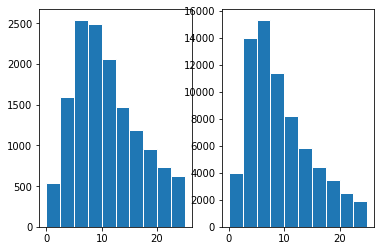

In [57]:
figura, eixos=plt.subplots(1,2)
eixos[0].hist(df_casual['duration'],range=(0,25),ec='white')
eixos[1].hist(df_member['duration'],range=(0,25),ec='white')

Agora vamos ver valores de media, quantis, desvio padrão, minimo e maximo.
dividimos os dados em usuario casual e member.

In [58]:
df_casual['duration'].describe()

count    18095.000000
mean        24.467703
std        178.506708
min          0.016667
25%          7.366667
50%         12.266667
75%         22.450000
max      19825.916667
Name: duration, dtype: float64

In [59]:
df_member['duration'].describe()

count    78635.000000
mean        12.494131
std         23.833740
min          0.000000
25%          5.250000
50%          8.683333
75%         15.083333
max       1470.166667
Name: duration, dtype: float64

As medias estão muito distantes das medianas e isso se deve aos outlier, as medianas são similares o que indica que não ha correlação entre ser member e a duração da corrida.

In [60]:
df_electric= df[df['rideable_type']=='electric_bike']
df_classic= df[df['rideable_type']=='classic_bike']
df_docked= df[df['rideable_type']=='docked_bike']

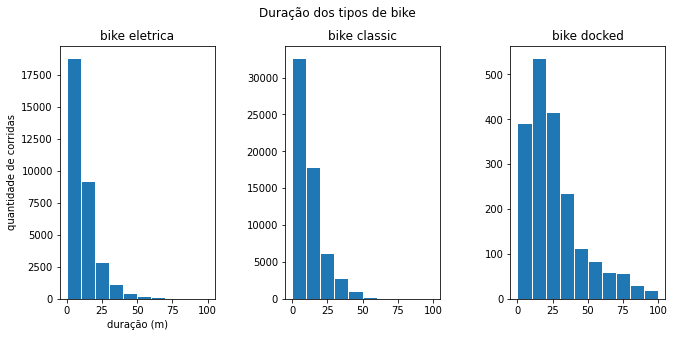

In [61]:
figura, eixos=plt.subplots(1,3,figsize=(10,5))
eixos[0].hist(df_electric['duration'],range=(0,100),ec='white')
eixos[1].hist(df_classic['duration'],range=(0,100),ec='white')
eixos[2].hist(df_docked['duration'],range=(0,100),ec='white')
figura.suptitle('Duração dos tipos de bike')
eixos[0].set_xlabel('duração (m)')
eixos[0].set_ylabel('quantidade de corridas')
eixos[0].set_title('bike eletrica')
eixos[1].set_title('bike classic')
eixos[2].set_title('bike docked')
figura.tight_layout(pad=3.0)

Agora vamos exibir as medidas de media, quantis, desvio padrão, minimo e maximo.
dividimos por tipo de bicicleta.

In [62]:
df_electric['duration'].describe()

count    33027.000000
mean        12.438091
std         14.537077
min          0.000000
25%          5.166667
50%          8.650000
75%         14.950000
max        480.000000
Name: duration, dtype: float64

In [63]:
df_classic['duration'].describe()

count    61597.000000
mean        14.082934
std         31.898596
min          0.000000
25%          5.666667
50%          9.400000
75%         16.416667
max       1489.066667
Name: duration, dtype: float64

In [64]:
df_docked['duration'].describe()

count     2106.000000
mean        69.781481
std        509.808455
min          0.066667
25%         12.200000
50%         22.950000
75%         39.983333
max      19825.916667
Name: duration, dtype: float64

Comparando os dados é possivel notar que a duração das corridas com as bicicletas docked possui media e medianas maiores, a bicicleta eletrica é mais rapida e mostra uma duração de corrida um pouco menor do que a classica.
supomos que os usuarios da bicicleta docked não estão andando de bicicleta o tempo todo do aluguel.

# Aprendizado de maquina 

Utilizando aprendizado de maquina para prever atraves das colunas da tabela qual tipo de bicicleta utilizada em uma corrida.





Mapeando a coluna `rideable_type` para valores inteiros e a coluna `member_casual` tambem.

In [65]:
df['rideable_type']=df['rideable_type'].replace(['classic_bike', 'docked_bike', 'electric_bike'], [0,1,2])

In [66]:
df['member_casual']=df['member_casual'].replace(['member', 'casual'], [0,1])

Definindo a coluna `rideable_type` como variavel resposta (y) e as colunas `duration` e `member casual` como variaveis preditoras (X).
Dividindo conjuntos de treino e teste.

In [67]:
y=df['rideable_type'].astype('int')
X=df[['duration','member_casual']]
X_train, X_val, y_train, y_val=train_test_split(X,y)

Definindo um clasificador `DecisionTreeClassifier` e treinando-o.

In [68]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Fazendo a predição e medindo a sua acuracia. Tambem gerando uma matriz de confusão.

In [69]:
pred=clf.predict(X_val)

In [70]:
accuracy_score(pred, y_val)

0.6296158458421205

In [71]:
confusion_matrix(y_val, pred)

array([[14073,   123,  1203],
       [  272,    63,   166],
       [ 7122,    71,  1090]])

Fazendo o mesmo para o classificador `RandomForestClassifier`

In [72]:
clf2=RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
predict2=clf2.predict(X_val)

In [74]:
accuracy_score(predict2, y_val)

0.6258115204896001

In [75]:
confusion_matrix(y_val, predict2)

array([[13801,   134,  1464],
       [  234,    66,   201],
       [ 6939,    77,  1267]])

Finalmente repitindo o processo para o `KneighborsClassifier`

In [76]:
clf3=KNeighborsClassifier()
clf3.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
predict3=clf3.predict(X_val)

In [78]:
accuracy_score(predict3, y_val)

0.579043129471116

In [79]:
confusion_matrix(y_val, predict3)

array([[11846,   142,  3411],
       [  280,    64,   157],
       [ 6088,   102,  2093]])

## Conclusão

Foi obtida uma acuracia cerca de 60% e as matrices de confusão mostram que teve dados diversos classificados incorretamente.

A pesar disso as bicicletas classicas foram as mais faceis de classificar.

Isso provavelmente se deve ao fato de que as variaveis duração e membro_casual não possuem alta correlação com o tipo de bicicleta.

Comparando os tres modelos de machine learning utilizados, é possivel notar que a decisiontree e randomforest alcaçaram uma acuracia maior do que o kneighbors. 